In [43]:
import pandas as pd
import numpy as np
import io
import nltk
import re
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


In [44]:
from google.colab import files
uploaded= files.upload()

Saving Stress.csv to Stress (4).csv


In [45]:
df = pd.read_csv(io.BytesIO(uploaded['Stress.csv']))

In [46]:
print(df.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text  label  confidence  \
0  He said he had not felt that way before, sugge...      1         0.8   
1  Hey there r/assistance, Not sure if this is th...      0         1.0   
2  My mom then hit me with the newspaper and it s...      1         0.8   
3  until i met my new boyfriend, he is amazing, h...      1         0.6   
4  October is Domestic Violence Awareness Month a...      1         0.8   

   social_timestamp  
0        1521614353  
1        1527009817  
2        1535935605  
3        1516429555  
4        1539809005  


Finding out how many null values are in the columns

In [47]:
print(df.isnull().sum())

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64


Clean the data in the text column

In [48]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword= set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This visualization is my fav part lol

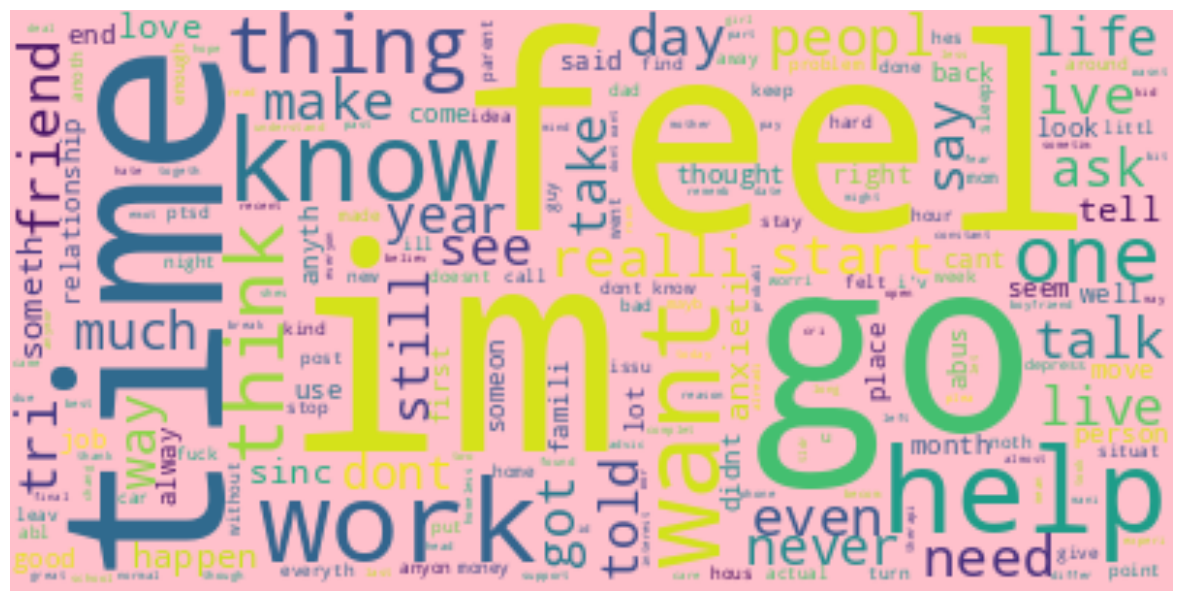

In [49]:
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                      background_color="pink").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Selecting the text and label columns, relabelling 0 as "not stressed" :) and 1 as "stressed" :(

In [50]:
df["label"] = df["label"].map({0: "Not Stressed" , 1: "Stressed"})
df = df[["text", "label"]]
print(df.head())

                                                text         label
0  said felt way sugget go rest trigger ahead you...      Stressed
1  hey rassist sure right place post goe  im curr...  Not Stressed
2  mom hit newspap shock would know dont like pla...      Stressed
3  met new boyfriend amaz kind sweet good student...      Stressed
4  octob domest violenc awar month domest violenc...      Stressed


Splitting the datasets

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(df["text"])
y = np.array(df["label"])

cv = CountVectorizer()
X= cv.fit_transform(x)
xtrain,xtest, ytrain,ytest = train_test_split(X, y,
                                              test_size = 0.33,
                                              random_state= 42)

Insert Bernoulli Naive Bayes algorithm :)

In [52]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

Testing time!

In [ ]:
user = input("Say something :)")
df = cv.transform([user]).toarray()
output = model.predict(df)
print(output)